In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

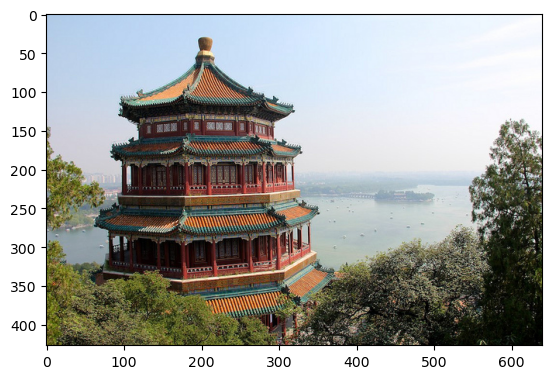

In [8]:
china = load_sample_image("china.jpg")
plt.imshow(china)

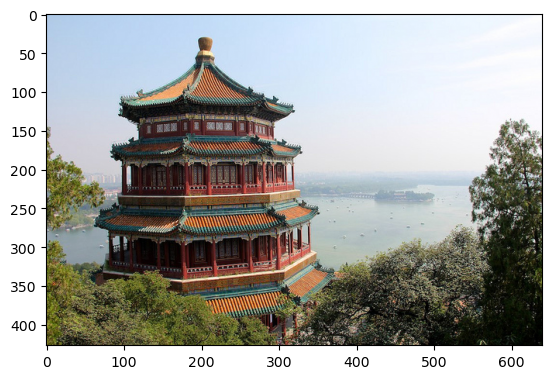

In [10]:
china = np.array(china , dtype = np.float64) / 255
plt.imshow(china)

In [11]:
china

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

In [12]:

w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [26]:
U, sigma, Vt = np.linalg.svd(image_array, full_matrices=False)
Rank1 = np.outer(U[:, 0], sigma[0] * Vt[0, :])
Rank2 = np.outer(U[:, 0], sigma[0] * Vt[0, :]) + np.outer(U[:, 1], sigma[1] * Vt[1, :])
Rank3 = np.outer(U[:, 0], sigma[0] * Vt[0, :]) + np.outer(U[:, 1], sigma[1] * Vt[1, :]) + np.outer(U[:, 2], sigma[2] * Vt[2, :])
print(Rank1.shape)
print(Rank2.shape)
print(Rank3.shape)

(273280, 3)
(273280, 3)
(273280, 3)


In [27]:
Rank1_image = np.reshape(Rank1, (w, h, 3))
Rank2_image = np.reshape(Rank2, (w, h, 3))
Rank3_image = np.reshape(Rank3, (w, h, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


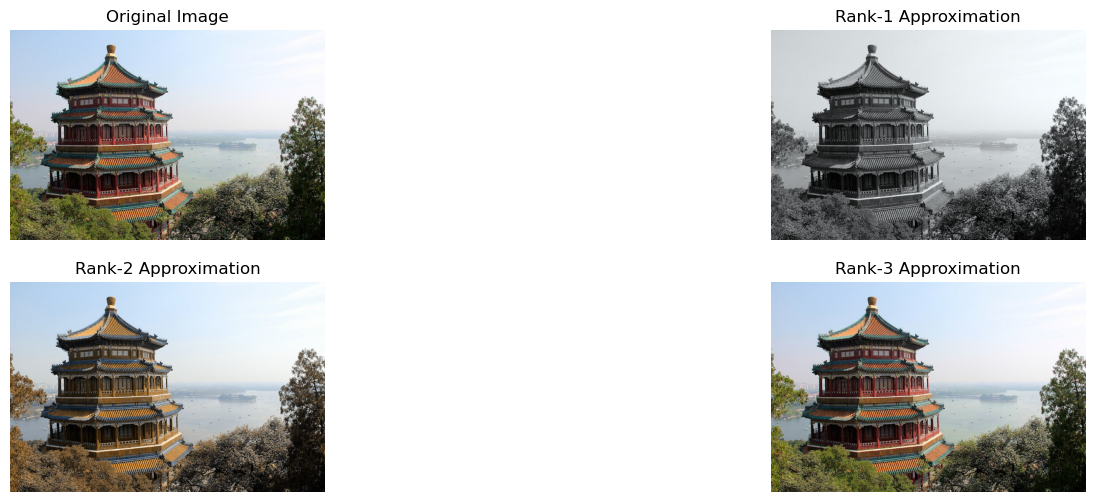

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(18, 6))

axes[0, 0].imshow(china)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(Rank1_image)
axes[0, 1].set_title("Rank-1 Approximation")
axes[0, 1].axis("off")

axes[1, 0].imshow(Rank2_image)
axes[1, 0].set_title("Rank-2 Approximation")
axes[1, 0].axis("off")

axes[1, 1].imshow(Rank3_image)
axes[1, 1].set_title("Rank-3 Approximation")
axes[1, 1].axis("off")

plt.show()

In [33]:
error_rank_1 = sigma[1] 
error_rank_2 = sigma[2] 
error_rank_3 = sigma[3] 
print("Error for Rank-1 approximation:", error_rank_1)
print("Error for Rank-2 approximation:", error_rank_2)
print("Error for Rank-3 approximation:", error_rank_3)

IndexError: index 3 is out of bounds for axis 0 with size 3